https://www.tensorflow.org/tutorials/quickstart/beginner

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
tf.compat.v1.enable_eager_execution()
print("TensorFlow version:", tf.__version__)

TensorFlow version: 1.14.0


In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

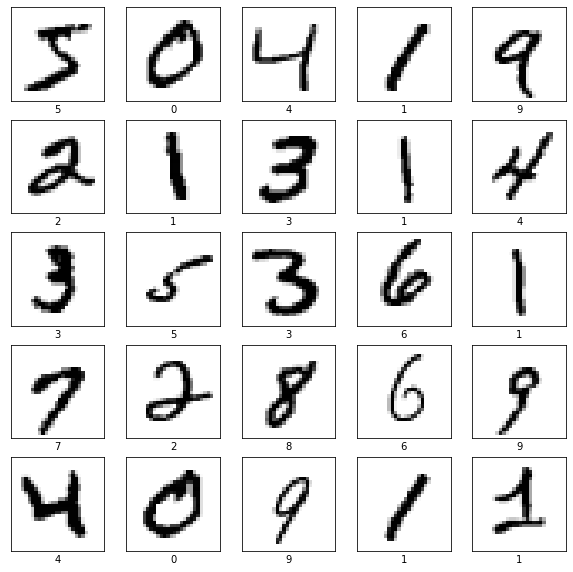

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()


In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [7]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.04842866, -0.97709477, -0.61941266, -0.4757914 , -0.3897296 ,
         0.22721682,  0.07390819,  0.08967537,  0.08383504,  0.6470493 ]],
      dtype=float32)

In [8]:
tf.nn.softmax(predictions).numpy()

array([[0.10836589, 0.03886095, 0.05557159, 0.06415445, 0.06992024,
        0.12958041, 0.1111625 , 0.1129291 , 0.11227148, 0.19718337]],
      dtype=float32)

In [9]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [10]:
loss_fn(y_train[:1], predictions).numpy()

2.0434537

In [11]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [12]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2967 - acc: 0.9127
Epoch 2/5
60000/60000 [==============================] - 3s 46us/sample - loss: 0.1388 - acc: 0.9583
Epoch 3/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.1058 - acc: 0.9671
Epoch 4/5
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0858 - acc: 0.9736
Epoch 5/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0767 - acc: 0.9755


In [13]:
model.evaluate(x_test,  y_test, verbose=2)

10000/10000 - 0s - loss: 0.0721 - acc: 0.9782


[0.07211381737980992, 0.9782]

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.save_weights('./model/hehe')

In [16]:
model_new = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [17]:
model_new.load_weights('./model/hehe')

In [18]:
probability_model = tf.keras.Sequential([
  model_new,
  tf.keras.layers.Softmax()
])

In [19]:
probability_model(x_test[:5])

<tf.Tensor: id=68469, shape=(5, 10), dtype=float32, numpy=
array([[1.3400551e-08, 3.1531204e-09, 2.9662312e-06, 4.1232858e-04,
        1.7949027e-12, 1.1673336e-07, 2.0238277e-14, 9.9958402e-01,
        2.1233063e-07, 4.2704951e-07],
       [5.2673749e-10, 2.8901664e-05, 9.9996769e-01, 3.3465487e-06,
        6.9641958e-16, 3.1169454e-09, 1.0696098e-10, 1.8780418e-12,
        1.2716682e-08, 3.8371467e-14],
       [3.8797864e-07, 9.9877077e-01, 5.8513886e-04, 1.0684810e-05,
        3.7824484e-05, 8.7764965e-06, 2.9785311e-05, 2.5798570e-04,
        2.9762555e-04, 9.0968587e-07],
       [9.9975854e-01, 3.0848307e-10, 4.2520132e-05, 7.5304136e-08,
        1.2361336e-07, 4.0401210e-07, 1.3746876e-04, 6.0280356e-05,
        7.4997644e-09, 6.1084404e-07],
       [3.5713501e-06, 1.9077214e-08, 9.9747476e-06, 2.1540976e-07,
        9.9097860e-01, 1.9116634e-07, 1.9592146e-06, 3.7419417e-05,
        1.7538488e-06, 8.9663994e-03]], dtype=float32)>

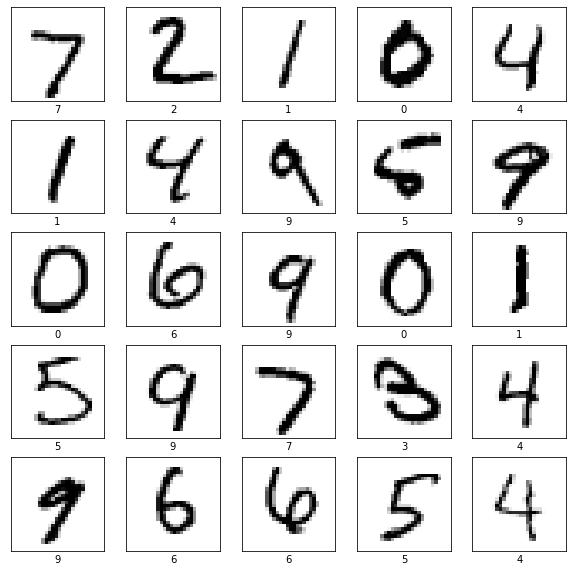

In [20]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_test[i]])
plt.show()

In [21]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)


In [22]:
predictions = probability_model.predict(x_test)

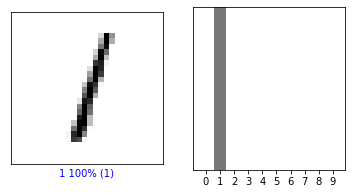

In [23]:
i = 2
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

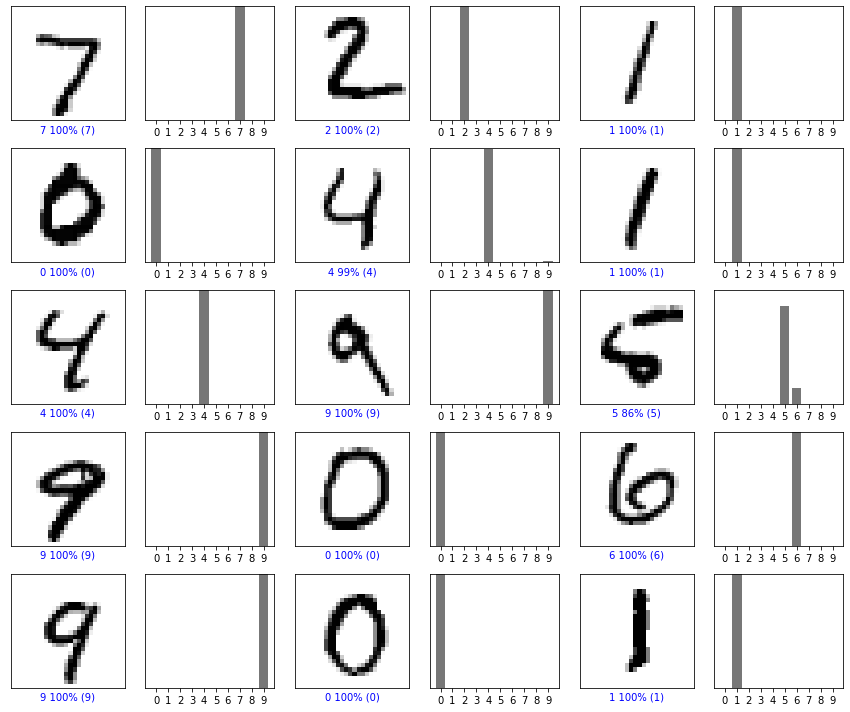

In [24]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i],  y_test)
plt.tight_layout()
plt.show()
